In [ ]:
#References
Time series ARIMA - https://medium.com/analytics-vidhya/time-series-analysis-forecasting-departure-delays-776d22636179

In [16]:
#Import all libraries
import time
from time import strftime,gmtime
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
from collections import OrderedDict
import matplotlib.cm as cm


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")


In [59]:
#Read a csv file
df=pd.read_csv('flights.csv')


In [60]:
df.shape

(5819079, 31)

In [61]:
airports=pd.read_csv('airports.csv')


In [62]:
airlines=pd.read_csv('airlines.csv')

DATA PREPROCESSING, REMOVING NAS, VISUALIZATIONS

In [63]:
df.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.000000,-22.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.000000,-9.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.000000,5.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.000000,-9.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.000000,-21.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.000000,8.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.000000,-17.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.000000,-10.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.000000,-13.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.000000,-15.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [65]:
df.loc[:,('YEAR','MONTH')].dtypes

YEAR     int64
MONTH    int64
dtype: object

In [66]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [67]:
def conv_time(time_val):
    if pd.isnull(time_val):
        return np.nan
    else:
        if time_val==2400:
            time_val=0
        time_val="{0:04d}".format(int(time_val))
        time_formatted=datetime.time(int(time_val[0:2]),int(time_val[2:4]))
    return time_formatted
        
        

In [68]:
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(conv_time)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(conv_time)
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(conv_time)
df['WHEELS_OFF'] = df['WHEELS_OFF'].apply(conv_time)
df['WHEELS_ON'] = df['WHEELS_ON'].apply(conv_time)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(conv_time)

In [69]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF              object
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON               object
TAXI_IN                float64
SCHEDULED_ARRIVAL       object
ARRIVAL_TIME            object
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [70]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00:05:00,...,04:08:00,-22.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00:10:00,...,07:41:00,-9.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,00:20:00,...,08:11:00,5.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00:20:00,...,07:56:00,-9.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00:25:00,...,02:59:00,-21.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.count()

YEAR                   5819079
MONTH                  5819079
DAY                    5819079
DAY_OF_WEEK            5819079
AIRLINE                5819079
FLIGHT_NUMBER          5819079
TAIL_NUMBER            5804358
ORIGIN_AIRPORT         5819079
DESTINATION_AIRPORT    5819079
SCHEDULED_DEPARTURE    5819079
DEPARTURE_TIME         5732926
DEPARTURE_DELAY        5732926
TAXI_OUT               5730032
WHEELS_OFF             5730032
SCHEDULED_TIME         5819073
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5819079
WHEELS_ON              5726566
TAXI_IN                5726566
SCHEDULED_ARRIVAL      5819079
ARRIVAL_TIME           5726566
ARRIVAL_DELAY          5714008
DIVERTED               5819079
CANCELLED              5819079
CANCELLATION_REASON      89884
AIR_SYSTEM_DELAY       1063439
SECURITY_DELAY         1063439
AIRLINE_DELAY          1063439
LATE_AIRCRAFT_DELAY    1063439
WEATHER_DELAY          1063439
dtype: int64

In [30]:
df.isnull().values.any()

True

In [72]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [73]:
#Function for null analysis
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values(nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null vales (%)'}))
    return tab_info
    
    

In [74]:
nullAnalysis(df)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,object,int64,object,object,object,object,...,object,float64,int64,int64,object,float64,float64,float64,float64,float64
null values(nb),0,0,0,0,0,0,14721,0,0,0,...,92513,105071,0,0,5729195,4755640,4755640,4755640,4755640,4755640
null vales (%),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252978,0.000000,0.000000,0.000000,...,1.589822,1.805629,0.000000,0.000000,98.455357,81.724960,81.724960,81.724960,81.724960,81.724960


In [75]:
#df=df.fillna(df.mean())
df['AIRLINE_DELAY'] =df['AIRLINE_DELAY'].fillna(0)
df['AIR_SYSTEM_DELAY'] =df['AIR_SYSTEM_DELAY'].fillna(0)
df['SECURITY_DELAY'] =df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] =df['LATE_AIRCRAFT_DELAY'].fillna(0)
df['WEATHER_DELAY'] =df['WEATHER_DELAY'].fillna(0)


In [76]:
nullAnalysis(df)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,object,int64,object,object,object,object,...,object,float64,int64,int64,object,float64,float64,float64,float64,float64
null values(nb),0,0,0,0,0,0,14721,0,0,0,...,92513,105071,0,0,5729195,0,0,0,0,0
null vales (%),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252978,0.000000,0.000000,0.000000,...,1.589822,1.805629,0.000000,0.000000,98.455357,0.000000,0.000000,0.000000,0.000000,0.000000


In [77]:
df['AIRLINE'].value_counts().to_frame()

,AIRLINE
WN,1261855
DL,875881
AA,725984
OO,588353
EV,571977
UA,515723
MQ,294632
B6,267048
US,198715
AS,172521


In [78]:
def get_stats(group):
    return{'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

global_stats=df['AIRLINE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats=global_stats.sort_values('count')
global_stats




,min,max,count,mean
AIRLINE,,,,
VX,0.000000,651.000000,61903.000000,2.111529
HA,0.000000,1467.000000,76272.000000,2.575283
F9,0.000000,996.000000,90836.000000,3.819521
NK,0.000000,723.000000,117379.000000,4.013623
AS,0.000000,950.000000,172521.000000,2.013813
US,0.000000,750.000000,198715.000000,3.202184
B6,0.000000,942.000000,267048.000000,4.021959
MQ,0.000000,1528.000000,294632.000000,3.580850
UA,0.000000,1185.000000,515723.000000,4.293609


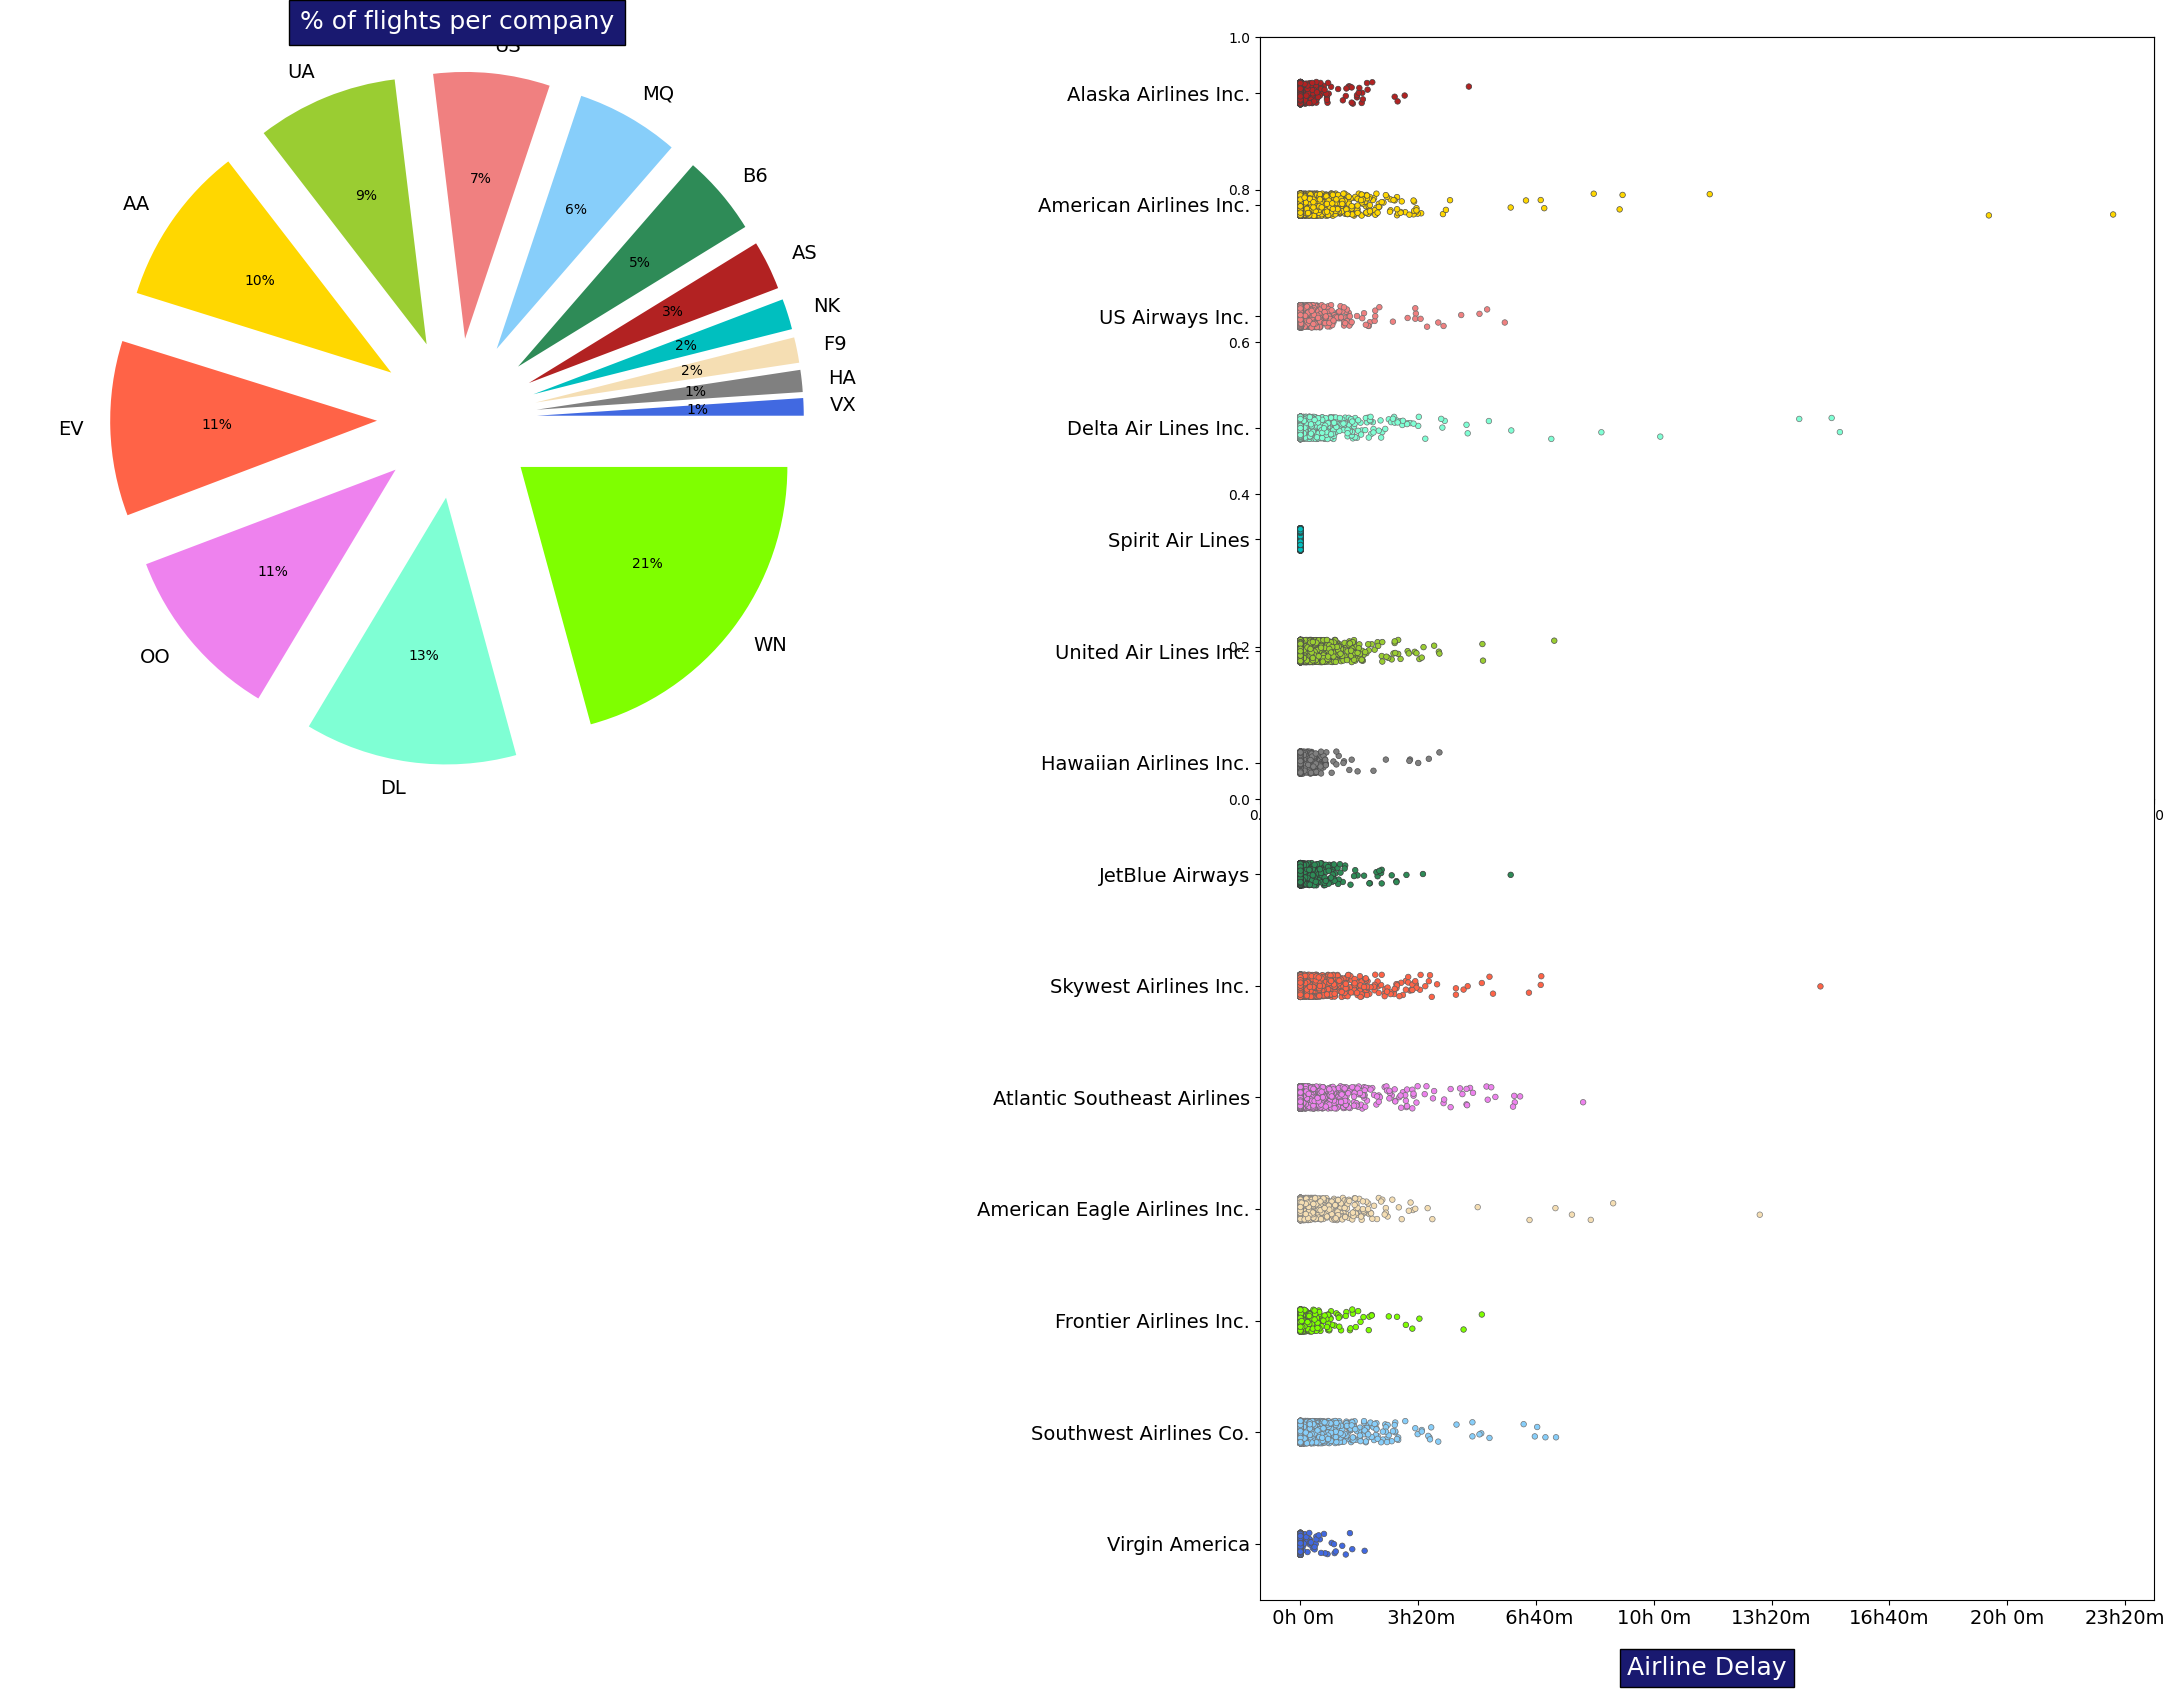

In [40]:
global_stats1=global_stats
global_stats =global_stats1.head(14)

codes=global_stats.index.tolist()
airlines1=airlines[airlines['IATA_CODE'].isin(codes)]
abbr_companies=airlines1.set_index('IATA_CODE')['AIRLINE'].to_dict()

import matplotlib.patches as mpatches

df2=df.loc[:,['AIRLINE','AIRLINE_DELAY']]
df2['AIRLINE']=df2['AIRLINE'].replace(abbr_companies)
colors=['royalblue','grey','wheat','c','firebrick','seagreen','lightskyblue',
       'lightcoral','yellowgreen','gold','tomato','violet','aquamarine','chartreuse']
fig=plt.figure(1,figsize=(22,17))
gs=GridSpec(2,2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1:])

labels = [s for s in global_stats.index]
sizes=global_stats['count'].values

explode=[0.3 if sizes[i]<20000 else 0.0 for i in range(len(abbr_companies))]
patches,texts,autotexts = ax1.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.0f%%',shadow=False,startangle=0)
for i in range(len(abbr_companies)):
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue','pad':5},
             color='w',fontsize=18)

codes=global_stats1.index.tolist()
airlines1=airlines[airlines['IATA_CODE'].isin(codes)]
abbr_companies=airlines1.set_index('IATA_CODE')['AIRLINE'].to_dict()

colors=['firebrick','gold','lightcoral','aquamarine','c','yellowgreen','grey','seagreen',
       'tomato','violet','wheat','chartreuse','lightskyblue','royalblue','black','grey','white',
       'silver','black','pink']

ax3=sns.stripplot(y="AIRLINE",x="AIRLINE_DELAY",size=4,palette=colors,data=df2,linewidth=0.5,jitter=True)
plt.setp(ax3.get_xticklabels(),fontsize=14)
plt.setp(ax3.get_yticklabels(),fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)]) for x in ax3.get_xticks()])

plt.xlabel('Airline Delay',fontsize=18,bbox={'facecolor':'midnightblue','pad':5},
          color='w',labelpad=20)
ax3.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3)








In [79]:
df['CANCELLATION_REASON'].value_counts().to_frame()

,CANCELLATION_REASON
B,48851
A,25262
C,15749
D,22


In [80]:
df.loc[df['CANCELLATION_REASON'].notnull(),['CANCELLATION_REASON']].head(15)

,CANCELLATION_REASON
32,A
42,B
68,B
82,B
90,A
128,B
131,A
147,B
166,B
206,B


In [81]:
df['CANCELLATION_REASON'].value_counts().to_frame()

,CANCELLATION_REASON
B,48851
A,25262
C,15749
D,22


In [82]:
#Dummy cancellation Reasons
df.loc[df['CANCELLATION_REASON'] =='A','CANCELLATION_REASON'] =1
df.loc[df['CANCELLATION_REASON'] =='B','CANCELLATION_REASON'] =2
df.loc[df['CANCELLATION_REASON'] =='C','CANCELLATION_REASON'] =3
df.loc[df['CANCELLATION_REASON'] =='D','CANCELLATION_REASON'] =4

df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].fillna(0)

In [83]:
nullAnalysis(df)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,object,int64,object,object,object,object,...,object,float64,int64,int64,int64,float64,float64,float64,float64,float64
null values(nb),0,0,0,0,0,0,14721,0,0,0,...,92513,105071,0,0,0,0,0,0,0,0
null vales (%),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252978,0.000000,0.000000,0.000000,...,1.589822,1.805629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [84]:
df.count()

YEAR                   5819079
MONTH                  5819079
DAY                    5819079
DAY_OF_WEEK            5819079
AIRLINE                5819079
FLIGHT_NUMBER          5819079
TAIL_NUMBER            5804358
ORIGIN_AIRPORT         5819079
DESTINATION_AIRPORT    5819079
SCHEDULED_DEPARTURE    5819079
DEPARTURE_TIME         5732926
DEPARTURE_DELAY        5732926
TAXI_OUT               5730032
WHEELS_OFF             5730032
SCHEDULED_TIME         5819073
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5819079
WHEELS_ON              5726566
TAXI_IN                5726566
SCHEDULED_ARRIVAL      5819079
ARRIVAL_TIME           5726566
ARRIVAL_DELAY          5714008
DIVERTED               5819079
CANCELLED              5819079
CANCELLATION_REASON    5819079
AIR_SYSTEM_DELAY       5819079
SECURITY_DELAY         5819079
AIRLINE_DELAY          5819079
LATE_AIRCRAFT_DELAY    5819079
WEATHER_DELAY          5819079
dtype: int64

In [85]:
df=df.dropna(axis=0)

In [86]:
df_time = df[[
    'SCHEDULED_DEPARTURE',
    'DEPARTURE_TIME',
    'DEPARTURE_DELAY',
    'TAXI_OUT',
    'WHEELS_OFF',
    'SCHEDULED_TIME',
    'ELAPSED_TIME',
    'AIR_TIME',
    'DISTANCE',
    'WHEELS_ON',
    'TAXI_IN',
    'SCHEDULED_ARRIVAL',
    'ARRIVAL_TIME',
    'ARRIVAL_DELAY',
    'DIVERTED',
    'CANCELLED',
    'CANCELLATION_REASON',
    'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY',
    'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY',
    'WEATHER_DELAY'
]]

In [87]:
#Set all the time columns to float
pd.set_option('float_format','{:f}'.format)
df_time.describe()

,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000,5714008.000000
mean,9.294842,16.065498,141.893974,137.006189,113.511628,824.456903,7.429063,4.407057,0.000000,0.000000,0.000000,2.508880,0.014173,3.530439,4.368550,0.542567
std,36.889724,8.882449,75.313998,74.211072,72.230822,608.661990,5.618951,39.271297,0.000000,0.000000,0.000000,13.171022,0.925175,22.049916,20.754214,8.887775
min,-82.000000,1.000000,18.000000,14.000000,7.000000,31.000000,1.000000,-87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.000000,11.000000,85.000000,82.000000,60.000000,373.000000,4.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,14.000000,123.000000,118.000000,94.000000,650.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,19.000000,174.000000,168.000000,144.000000,1065.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1988.000000,225.000000,718.000000,766.000000,690.000000,4983.000000,248.000000,1971.000000,0.000000,0.000000,0.000000,1134.000000,573.000000,1971.000000,1331.000000,1211.000000


In [88]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [89]:
df['AIRLINE'].value_counts().to_frame()

,AIRLINE
WN,1242403
DL,870275
AA,712935
OO,576814
EV,554752
UA,507762
MQ,278791
B6,262042
US,194223
AS,171439


In [90]:
#merge airlines csv file dataframe to df
df=df.merge(airlines,left_on='AIRLINE',right_on='IATA_CODE',how='inner')
df


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00:05:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,00:25:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,00:45:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,00:50:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,01:15:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,AS,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,4,VX,769,N622VA,LGA,DAL,18:55:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America
5714004,2015,12,31,4,VX,357,N284VA,BOS,SFO,18:59:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America
5714005,2015,12,31,4,VX,1916,N853VA,SFO,LAS,19:40:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America
5714006,2015,12,31,4,VX,490,N840VA,LAX,LAS,19:50:00,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America


In [91]:
df=df.drop(['AIRLINE_x','IATA_CODE'],axis=1)
df=df.rename(columns={'AIRLINE_y':"AIRLINE"})
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,00:05:00,23:54:00,...,-22.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,00:25:00,00:24:00,...,-21.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,00:45:00,00:41:00,...,-14.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,00:50:00,00:46:00,...,-18.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,01:15:00,01:07:00,...,-3.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,4,769,N622VA,LGA,DAL,18:55:00,18:47:00,...,-6.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America
5714004,2015,12,31,4,357,N284VA,BOS,SFO,18:59:00,18:49:00,...,-46.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America
5714005,2015,12,31,4,1916,N853VA,SFO,LAS,19:40:00,19:33:00,...,-18.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America
5714006,2015,12,31,4,490,N840VA,LAX,LAS,19:50:00,19:48:00,...,-11.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America


In [92]:
df_grouped_sum = df.groupby('AIRLINE',as_index=False)['ARRIVAL_DELAY'].agg('sum').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_SUM"})
#df_grouped_sum
df_grouped_cnt=df.groupby('AIRLINE',as_index=False)['ARRIVAL_DELAY'].agg('count').rename(columns={'ARRIVAL_DELAY':'ARRIVAL_DELAY_COUNT'})
df_grouped_cnt.sort_values(by='ARRIVAL_DELAY_COUNT',ascending=False)
df_grouped_delay=df_grouped_sum.merge(df_grouped_cnt,left_on='AIRLINE',right_on='AIRLINE',how='inner')
df_grouped_delay.loc[:,'AVG_DELAY_AIRLINE']=df_grouped_delay['ARRIVAL_DELAY_SUM']/df_grouped_delay['ARRIVAL_DELAY_COUNT']
df_grouped_delay.sort_values('ARRIVAL_DELAY_SUM',ascending=False)




,AIRLINE,ARRIVAL_DELAY_SUM,ARRIVAL_DELAY_COUNT,AVG_DELAY_AIRLINE
9,Southwest Airlines Co.,5435468.000000,1242403,4.374964
3,Atlantic Southeast Airlines,3653252.000000,554752,6.585379
8,Skywest Airlines Inc.,3371854.000000,576814,5.845652
12,United Air Lines Inc.,2757957.000000,507762,5.431594
1,American Airlines Inc.,2460604.000000,712935,3.451372
2,American Eagle Airlines Inc.,1800397.000000,278791,6.457873
7,JetBlue Airways,1749880.000000,262042,6.677861
10,Spirit Air Lines,1667050.000000,115193,14.471800
5,Frontier Airlines Inc.,1126549.000000,90090,12.504706
11,US Airways Inc.,719831.000000,194223,3.706209


In [93]:
df['DELAYED']=df.loc[:,'ARRIVAL_DELAY'].values>0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5714007
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   FLIGHT_NUMBER        int64  
 5   TAIL_NUMBER          object 
 6   ORIGIN_AIRPORT       object 
 7   DESTINATION_AIRPORT  object 
 8   SCHEDULED_DEPARTURE  object 
 9   DEPARTURE_TIME       object 
 10  DEPARTURE_DELAY      float64
 11  TAXI_OUT             float64
 12  WHEELS_OFF           object 
 13  SCHEDULED_TIME       float64
 14  ELAPSED_TIME         float64
 15  AIR_TIME             float64
 16  DISTANCE             int64  
 17  WHEELS_ON            object 
 18  TAXI_IN              float64
 19  SCHEDULED_ARRIVAL    object 
 20  ARRIVAL_TIME         object 
 21  ARRIVAL_DELAY        float64
 22  DIVERTED             int64  
 23  CANCELLED            int64  
 24

In [95]:
df.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
AIRLINE                0
DELAYED                0
dtype: int64

In [97]:
df.shape

(5714008, 32)

In [ ]:
FEATURE ENGINEERING

In [98]:
features = [
    'YEAR',
    'MONTH',
    'DAY',
    'AIRLINE',
    'LATE_AIRCRAFT_DELAY',
    'AIRLINE_DELAY',
    'AIR_SYSTEM_DELAY',
    'WEATHER_DELAY',
    'ELAPSED_TIME',
    'DEPARTURE_DELAY',
    'SCHEDULED_TIME',
    'AIR_TIME',
    'TAXI_IN',
    'TAXI_OUT',
    'DISTANCE',
    'DAY_OF_WEEK',
    'SECURITY_DELAY'
    
]

In [100]:
X = df[features]

In [101]:
encoder=LabelEncoder()
X.iloc[:,features.index('AIRLINE')] = encoder.fit_transform(X.iloc[:,features.index('AIRLINE')])


In [102]:
encoder.inverse_transform(X.iloc[:,features.index('AIRLINE')])

array(['Alaska Airlines Inc.', 'Alaska Airlines Inc.',
       'Alaska Airlines Inc.', ..., 'Virgin America', 'Virgin America',
       'Virgin America'], dtype=object)

In [ ]:
TRAIN TEST SPLIT

In [103]:
y=df.AIRLINE_DELAY
y=np.array(y)
y

array([0., 0., 0., ..., 0., 0., 0.])

In [104]:
X=np.array(X)


In [105]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [106]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3999805, 17) (3999805,) (1714203, 17) (1714203,)


In [ ]:
 PREDICTION USING ALGORITHMS:
        RANDOM FOREST REGRESSOR
        RANDOM FOREST CLASSIFIER
        LOGISTIC REGRESSION
        DECISION TREE CLASSIFIER
        K-MEANS CLUSTERING - ELBOW METHOD
        K-MEDOIDS CLUSTERING
        BERNOULLI NAIVE BAYES
        K NEAREST NEIGHBOURS
        GRADIENT BOOSTING
        BAGGING CLASSIFIER
        XGBOOST
        RIDGE CLASSIFICATION
        KERAS NEURAL NETWORK
        RNN - LSTM
        

In [292]:
#RANDOM FOREST REGRESSOR
forest = RandomForestRegressor(n_estimators=100,random_state=42)

In [293]:
forest.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [294]:
y_pred=forest.predict(x_test)

In [295]:
y_pred.shape

(14626,)

In [296]:
print("MAE",mean_absolute_error(y_true=y_test,y_pred=y_pred))
print("MSE",mean_squared_error(y_true=y_test,y_pred=y_pred))
print(np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred)))
      

MAE 0.021014631478189532
MSE 1.0395628469848208
1.0195895482912822


In [297]:
importances = list(forest.feature_importances_)
print(importances)

[0.0, 0.0, 0.00015347923115146777, 0.0010257052969112697, 0.0003474556274762819, 0.9707340770543871, 0.0005343407950735623, 2.462869810469976e-09, 7.493055269715335e-05, 0.02480021006355265, 0.00048166620171905867, 0.00047360828627631866, 0.0003893430820602597, 0.00026453694938686535, 0.00046872960360054913, 0.0002519147928376039, 0.0]


In [299]:
feature_importance = [(feature,round(importance,2)) for feature, importance in zip(features,importances)]
feature_importance = sorted(feature_importance,key=lambda x:x[1],reverse=True)


In [300]:
print(feature_importance)

[('AIRLINE_DELAY', 0.97), ('DEPARTURE_DELAY', 0.02), ('YEAR', 0.0), ('MONTH', 0.0), ('DAY', 0.0), ('AIRLINE', 0.0), ('LATE_AIRCRAFT_DELAY', 0.0), ('AIR_SYSTEM_DELAY', 0.0), ('WEATHER_DELAY', 0.0), ('ELAPSED_TIME', 0.0), ('SCHEDULED_TIME', 0.0), ('AIR_TIME', 0.0), ('TAXI_IN', 0.0), ('TAXI_OUT', 0.0), ('DISTANCE', 0.0), ('DAY_OF_WEEK', 0.0), ('SECURITY_DELAY', 0.0)]


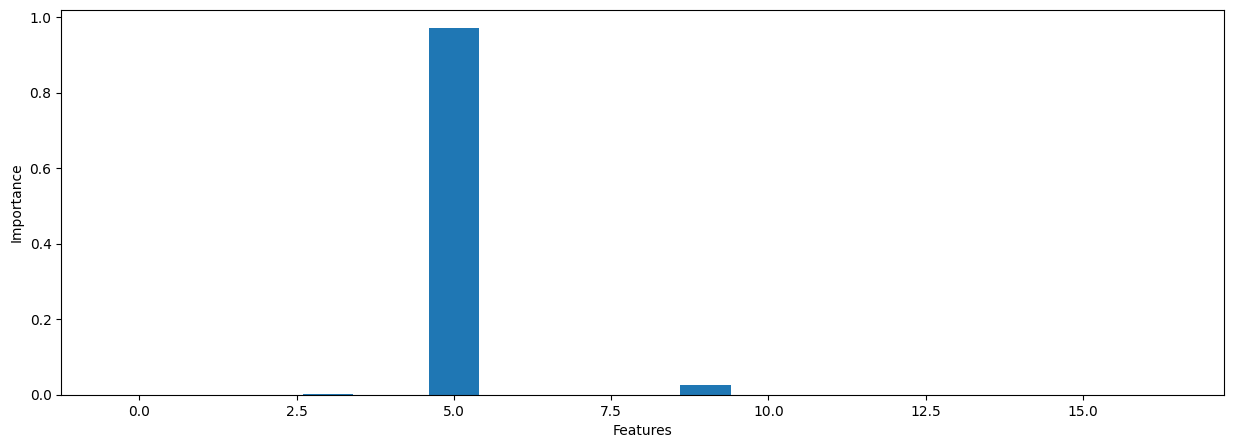

In [301]:
plt.figure(figsize=(15,5))
x_values=list(range(len(importances)))
plt.bar(x_values,importances,orientation='vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

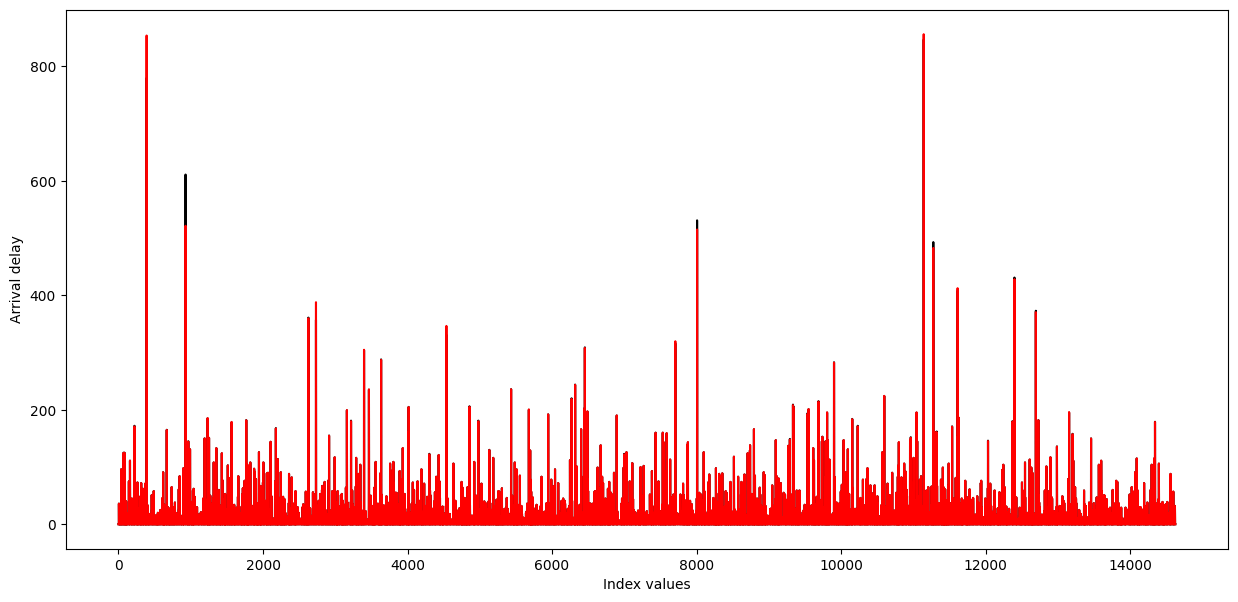

In [302]:
plt.figure(figsize=(15,7))
plt.plot(y_test,color='black')
plt.plot(y_pred,color='red')
plt.xlabel('Index values')
plt.ylabel('Arrival delay')
plt.show()

In [303]:
#R-score
print(forest.score(x_test,y_test))

0.998174859628422


In [304]:
#export to csv
pd.DataFrame(y_pred,columns=['predictions']).to_csv('predictions.csv')

In [ ]:
RANDOM FOREST CLASSIFIER

In [386]:
model = RandomForestClassifier(n_jobs=-1,random_state=42)
model.fit(x_train,y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [306]:
pred2=model.predict(x_test)

In [331]:
pred2.shape

(14626,)

In [333]:
y_test.shape

(14626,)

In [308]:
model.score(x_test,y_test)

0.9301928073294133

In [309]:
probabilities = model.predict_proba(x_test)

In [310]:
probabilities.shape

(14626, 268)

In [335]:
confusion_matrix(y_test,pred2)

array([[11864,     0,     0, ...,     0,     0,     0],
       [    0,    92,     0, ...,     0,     0,     0],
       [    0,     0,    79, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

In [ ]:
K-Means Clustering

In [349]:
X_1=df[['WEATHER_DELAY','SECURITY_DELAY']].values
#Normalize our array
min_max_scaler=preprocessing.MinMaxScaler()
X_Scaled = min_max_scaler.fit_transform(X_1)
X_1=pd.DataFrame(X_Scaled).values

In [ ]:
Elbow Method

In [350]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("N of Clusters")
plt.ylabel("WSS")
plt.legend()
plt.show

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X=df[['WEATHER','DIVERTED']].values
#Normalise array
min_max_scaler=preprocessing.MinMaxScaler()
X_Scaled = min_max_scaler.fit_transform(X_1)
X_1=pd.DataFrame(X_Scaled).values
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X_1)
k_means_labels=kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1],s=10,c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=30,c='red',label='Centroids')
plt.title('Clustering')
plt.xlabel('Arrival Diverted')
plt.ylabel('Weather Delay')
plt.legend()
plt.show()
            


In [ ]:
DECISION TREE CLASSIFIER

In [387]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [389]:
pred3=dt.predict(x_test)

In [390]:
pred3.shape

(14626,)

In [391]:
print(confusion_matrix(y_test,pred3))

[[11864     0     0 ...     0     0     0]
 [    0    92     0 ...     0     0     0]
 [    0     0    80 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [ ]:
BERNOULLI NAIVE BAYES

In [395]:
BNB=BernoulliNB()
BNB.fit(x_train,y_train)

BernoulliNB()

In [398]:
pred4 = BNB.predict(x_test)

In [399]:
pred4.shape

(14626,)

In [401]:
confusion = confusion_matrix(y_test,pred4)
print(confusion)

[[11864     0     0 ...     0     0     0]
 [    0     0    39 ...     0     0     0]
 [    0     0    39 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [ ]:
GRADIENT BOOSTING CLASSIFICATION

In [ ]:
GNB = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=42)

GNB.fit(x_train,y_train)



In [ ]:
pred5 = GNB.predict(x_test)

In [ ]:
pred5.shape

In [ ]:
confusion_matrix(y_test,pred5)

In [ ]:
TP=confusion[0,0]
TN=confusion[0,1]
FP=confusion[1,0]
FN=confusion[1,1]

classification_error = (FP+FN)/float(TP+TN+FP+FN)

In [ ]:
GNB_acc=accuracy_score(y_test,predictions)
GNB_sensitivity = (TP/float(FN+TP))
GNB_specificity = (TN/(TN+FP))

In [ ]:
print(GNB_acc,GNB_sensitivity,GNB_specificity)

In [ ]:
NEURAL NETWORK

In [52]:
x_train.shape

(34127, 17)

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
model=Sequential()
model.add(Dense(12,input_shape(6,),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

In [ ]:
model.compile(SGD(lr=0.003),"binary_crossentropy",metrics=["accuracy"])

In [ ]:
run_hist_1=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)




In [ ]:
x=run_hist_!
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(x.history['loss'],label="Training Loss")
plt.plot(x.history['val_loss'],label="Validation Loss")
plt.legend(loc='upper right')
plt.subplt(1,2,2)
plt.plot(x.history['accuracy'],label="Training Accuracy")
plt.plot(x.history['val_accuracy'],label="Validation Accuracy")
plt.legend(loc='upper right')
plt.show()



In [ ]:
y_pred_classnn_1=model.predict_classes(x_test)
y_pred_prob_nn_1=model.predict(x_test)

In [ ]:
nn_acc=accuracy_score(y_test,y_pred_class_nn_1)

In [ ]:
fig,ax=plt.subplots()
ax.plot(run_hist_1.history["loss"],'r',marker='.',label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b',marker='.',label="Validation Loss")
ax.legend()

